<a href="https://colab.research.google.com/github/ShamsuriIkhwan/plant-deep-learning/blob/main/alexnet_implementation_plant_health_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import **libraries**

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split


In [4]:
# Set the path to the original dataset folder
dir = '/content/drive/MyDrive/FYP dataset - 227'

# Set the path to the augmented dataset folder
aug_dir = '/content/aug_FYP dataset_227'


# Print the class names and the number of samples before augmentation
#227
print("For 227 dataset\n")
for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    if os.path.isdir(class_path):
        num_samples = len(os.listdir(class_path))
        print(f"Class: {class_name}, Samples: {num_samples}")

num_dir_classes=len(os.listdir(dir))
print("\n","There are", num_dir_classes, "classes in the folder\n")


For 227 dataset

Class: Banana___healthy, Samples: 100
Class: Guava___diseased, Samples: 100
Class: Mango___diseased, Samples: 100
Class: Durian___healthy, Samples: 100
Class: Corn___diseased, Samples: 100
Class: Corn___healthy, Samples: 100
Class: Banana___diseased, Samples: 100
Class: Mango___healthy, Samples: 100
Class: Guava___healthy, Samples: 100
Class: Durian___diseased, Samples: 100

 There are 10 classes in the folder



# **Visualisation**

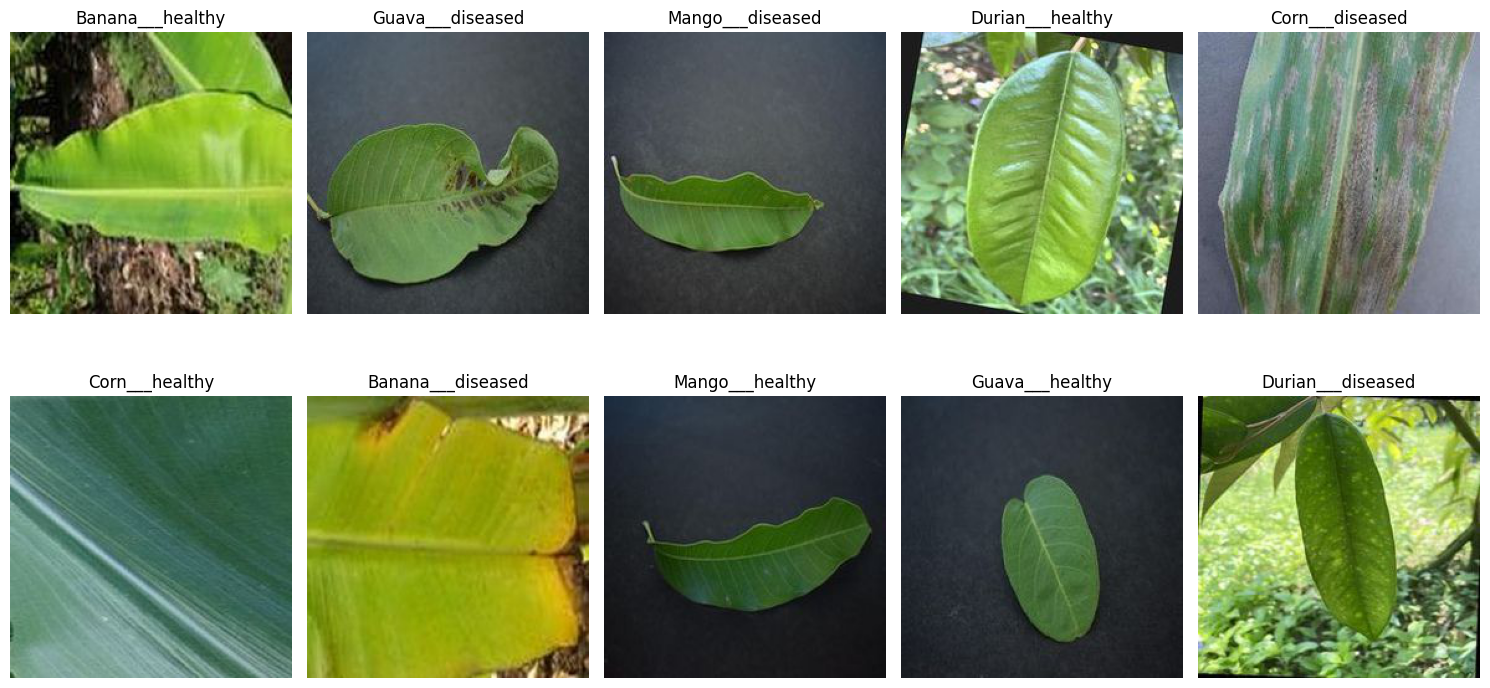

In [5]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the class names
for i, class_name in enumerate(os.listdir(dir)):
    class_path = os.path.join(dir, class_name)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)

        # Randomly select an image from the class
        selected_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, selected_image_file)
        image = plt.imread(image_path)

        # Plot the image in the corresponding subplot
        axes[i].imshow(image)
        axes[i].set_title(class_name)
        axes[i].axis('off')

plt.tight_layout()
plt.show()


# **Augmentation**

In [6]:
print("For 227 dataset augmentation\n")

# Perform data augmentation for each class
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Iterate over the classes in the original dataset
for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        num_samples = len(class_images)

        # Create a directory for the current class in the augmented dataset folder
        aug_class_dir = os.path.join(aug_dir, class_name)
        os.makedirs(aug_class_dir, exist_ok=True)

        # Copy original images to the augmented dataset folder
        for image_name in class_images:
            original_image_path = os.path.join(class_path, image_name)
            target_image_path = os.path.join(aug_class_dir, image_name)
            copyfile(original_image_path, target_image_path)

            # Apply data augmentation and save augmented images
            img = tf.keras.preprocessing.image.load_img(original_image_path)
            x = tf.keras.preprocessing.image.img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i = 0
            for batch in datagen.flow(x, batch_size=16,
                                      save_to_dir=aug_class_dir,
                                      save_prefix='aug',
                                      save_format='jpg'):
                i += 1
                if i > 20:
                    break


For 227 dataset augmentation



# **Data refining**

In [7]:
# Print the class names and the number of samples after augmentation
for class_name in os.listdir(aug_dir):
    class_path = os.path.join(aug_dir, class_name)
    if os.path.isdir(class_path):
        num_samples = len(os.listdir(class_path))
        print(f"Class: {class_name}, Samples: {num_samples}")

num_classes = len(os.listdir(aug_dir))
print("There are", num_classes, "classes in the folder")

Class: Corn___diseased, Samples: 1984
Class: Banana___healthy, Samples: 1989
Class: Mango___healthy, Samples: 1987
Class: Guava___healthy, Samples: 2005
Class: Corn___healthy, Samples: 1994
Class: Banana___diseased, Samples: 2004
Class: Durian___healthy, Samples: 2002
Class: Mango___diseased, Samples: 2003
Class: Durian___diseased, Samples: 2005
Class: Guava___diseased, Samples: 1997
There are 10 classes in the folder


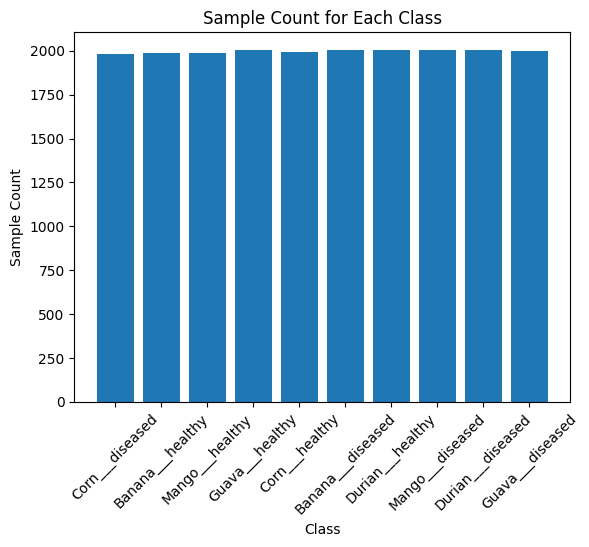

In [8]:
class_counts = []
class_labels = []

for class_name in os.listdir(aug_dir):
    class_path = os.path.join(aug_dir, class_name)
    file_count = len(os.listdir(class_path))
    class_counts.append(file_count)
    class_labels.append(class_name)

plt.bar(class_labels, class_counts)
plt.title('Sample Count for Each Class')
plt.xlabel('Class')
plt.ylabel('Sample Count')
plt.xticks(rotation=45)
plt.show()

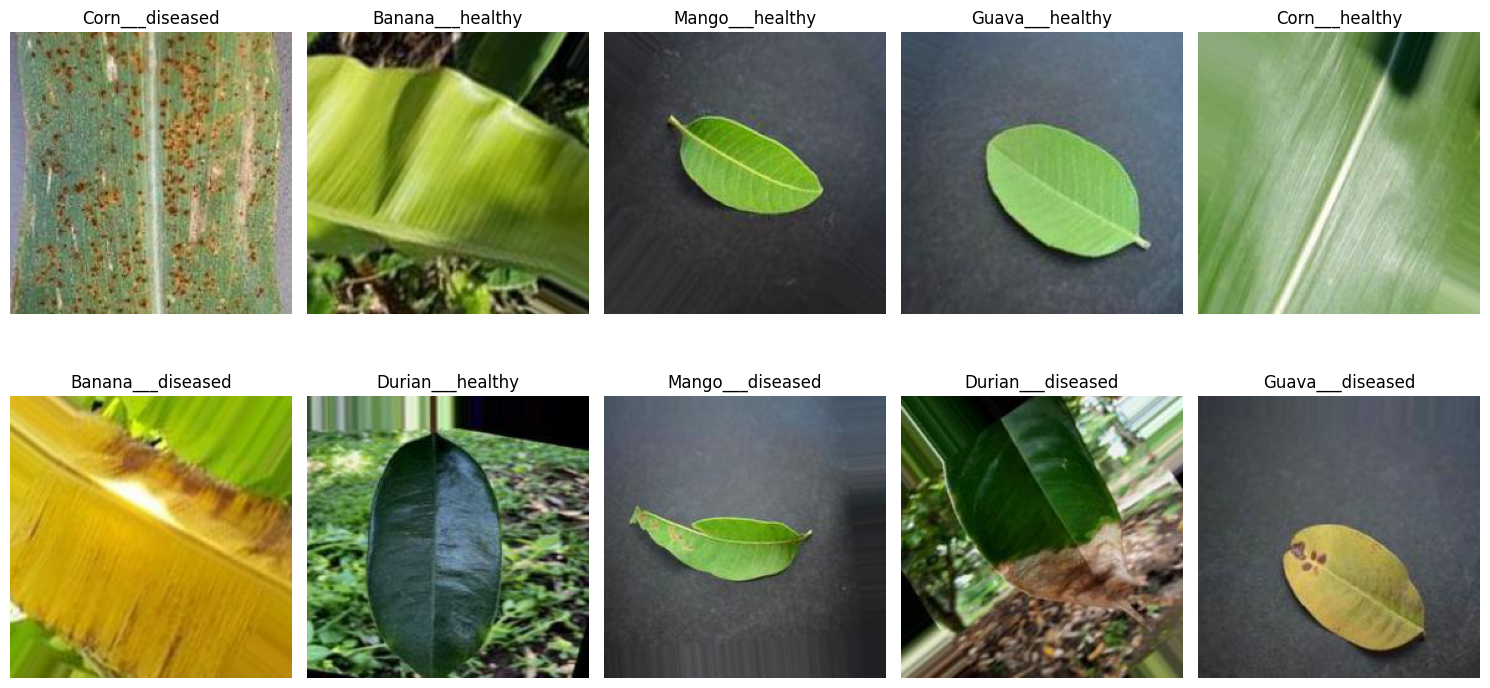

In [9]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the class names
for i, class_name in enumerate(os.listdir(aug_dir)):
    class_path = os.path.join(aug_dir, class_name)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)

        # Randomly select an image from the class
        selected_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, selected_image_file)
        image = plt.imread(image_path)

        # Plot the image in the corresponding subplot
        axes[i].imshow(image)
        axes[i].set_title(class_name)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

# **Splitting dataset**

In [10]:
# Set the path to the folder for the split dataset
split_dir = '/content/split_dataset_227'
os.makedirs(split_dir, exist_ok=True)

# Set the desired split ratios (e.g., 70% train, 15% validation, 15% test)
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Iterate over the class names
for class_name in os.listdir(aug_dir):
    class_path = os.path.join(aug_dir, class_name)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)

        # Split the image files into train, validation, and test sets
        train_files, val_test_files = train_test_split(image_files, test_size=val_ratio + test_ratio, random_state=42)
        val_files, test_files = train_test_split(val_test_files, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

        # Create directories for the train, validation, and test sets
        train_dir = os.path.join(split_dir, 'train', class_name)
        val_dir = os.path.join(split_dir, 'valid', class_name)
        test_dir = os.path.join(split_dir, 'test', class_name)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)

        # Move the images to the respective directories
        for file in train_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(train_dir, file)
            shutil.copy(src_path, dst_path)

        for file in val_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(val_dir, file)
            shutil.copy(src_path, dst_path)

        for file in test_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(test_dir, file)
            shutil.copy(src_path, dst_path)


In [11]:
# Define the directory names for train, validation, and test sets
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'valid')
test_dir = os.path.join(split_dir, 'test')

# Count the number of samples in each directory
train_samples = sum(len(files) for _, _, files in os.walk(train_dir))
val_samples = sum(len(files) for _, _, files in os.walk(val_dir))
test_samples = sum(len(files) for _, _, files in os.walk(test_dir))

# Print the number of samples in each directory
print(f"Train samples: {train_samples}")
print(f"Validation samples: {val_samples}")
print(f"Test samples: {test_samples}")

Train samples: 13973
Validation samples: 3995
Test samples: 2002


In [27]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

Path

In [28]:
train_dir='/content/split_dataset_227/train'
valid_dir='/content/split_dataset_227/valid'
test_dir='/content/split_dataset_227/test'

In [60]:
target_names = training_data.class_names
print(target_names)

['Banana___diseased', 'Banana___healthy', 'Corn___diseased', 'Corn___healthy', 'Durian___diseased', 'Durian___healthy', 'Guava___diseased', 'Guava___healthy', 'Mango___diseased', 'Mango___healthy']


# **Image preprocessing**

In [29]:
batch_size = 32
img_height,img_width = (227,227)

In [31]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

In [32]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 8388 images belonging to 10 classes.


In [33]:
valid_generator = train_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 1595 images belonging to 10 classes.


In [34]:
test_generator = train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 797 images belonging to 10 classes.


In [35]:
x, y = test_generator.next()
x.shape  # Display to confirm the shape of the input

(1, 227, 227, 3)

# Defining **alexnet** architecture

In [38]:
def AlexNet():
    input_layer = Input(shape=train_generator.image_shape)

    # First convolutional layer
    X = Conv2D(filters=96, kernel_size=(11, 11), strides=4, activation='relu', padding="same")(input_layer)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(3, 3), strides=2)(X)

    # Second convolutional layer
    X = Conv2D(filters=256, kernel_size=(5, 5), activation='relu', padding="same")(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(3, 3), strides=2)(X)

    # Third convolutional layer
    X = Conv2D(filters=384, kernel_size=(3, 3), strides=1, activation='relu', padding="same")(X)
    X = BatchNormalization()(X)

    # Fourth convolutional layer
    X = Conv2D(filters=384, kernel_size=(3, 3), strides=1, activation='relu', padding="same")(X)
    X = BatchNormalization()(X)

    # Fifth convolutional layer
    X = Conv2D(filters=256, kernel_size=(3, 3), strides=1, activation='relu', padding="same")(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(3, 3), strides=2)(X)

    # Flattening
    X = Flatten()(X)

    # First fully connected layer
    X = Dense(4096, activation='relu')(X)
    X = Dropout(0.5)(X)

    # Second fully connected layer
    X = Dense(4096, activation='relu')(X)
    X = Dropout(0.5)(X)

    # Output layer
    predictions = Dense(train_generator.num_classes, activation='softmax')(X)

    # Create the model
    model = Model(inputs=input_layer, outputs=predictions, name="AlexNet")
    return model


In [39]:
model = AlexNet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 96)        34944     
                                                                 
 batch_normalization_7 (Batc  (None, 57, 57, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 256)      1024

In [40]:
checkpoint_filepath = 'Saved_Model/AlexNet/50epoch.{epoch:02d}-{val_loss:.2f}.h5'

checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

In [41]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[checkpoint]
)


Epoch 1/50
263/263 [==============================] - ETA: 0s - loss: 4.2237 - accuracy: 0.5936
Epoch 1: val_accuracy improved from -inf to 0.69969, saving model to Saved_Model/AlexNet/50epoch.01-1.46.h5
263/263 [==============================] - 161s 590ms/step - loss: 4.2237 - accuracy: 0.5936 - val_loss: 1.4587 - val_accuracy: 0.6997
Epoch 2/50
263/263 [==============================] - ETA: 0s - loss: 0.9223 - accuracy: 0.7638
Epoch 2: val_accuracy improved from 0.69969 to 0.80878, saving model to Saved_Model/AlexNet/50epoch.02-0.59.h5
263/263 [==============================] - 158s 599ms/step - loss: 0.9223 - accuracy: 0.7638 - val_loss: 0.5864 - val_accuracy: 0.8088
Epoch 3/50
263/263 [==============================] - ETA: 0s - loss: 0.6770 - accuracy: 0.8144
Epoch 3: val_accuracy improved from 0.80878 to 0.85141, saving model to Saved_Model/AlexNet/50epoch.03-0.57.h5
263/263 [==============================] - 151s 573ms/step - loss: 0.6770 - accuracy: 0.8144 - val_loss: 0.5676 

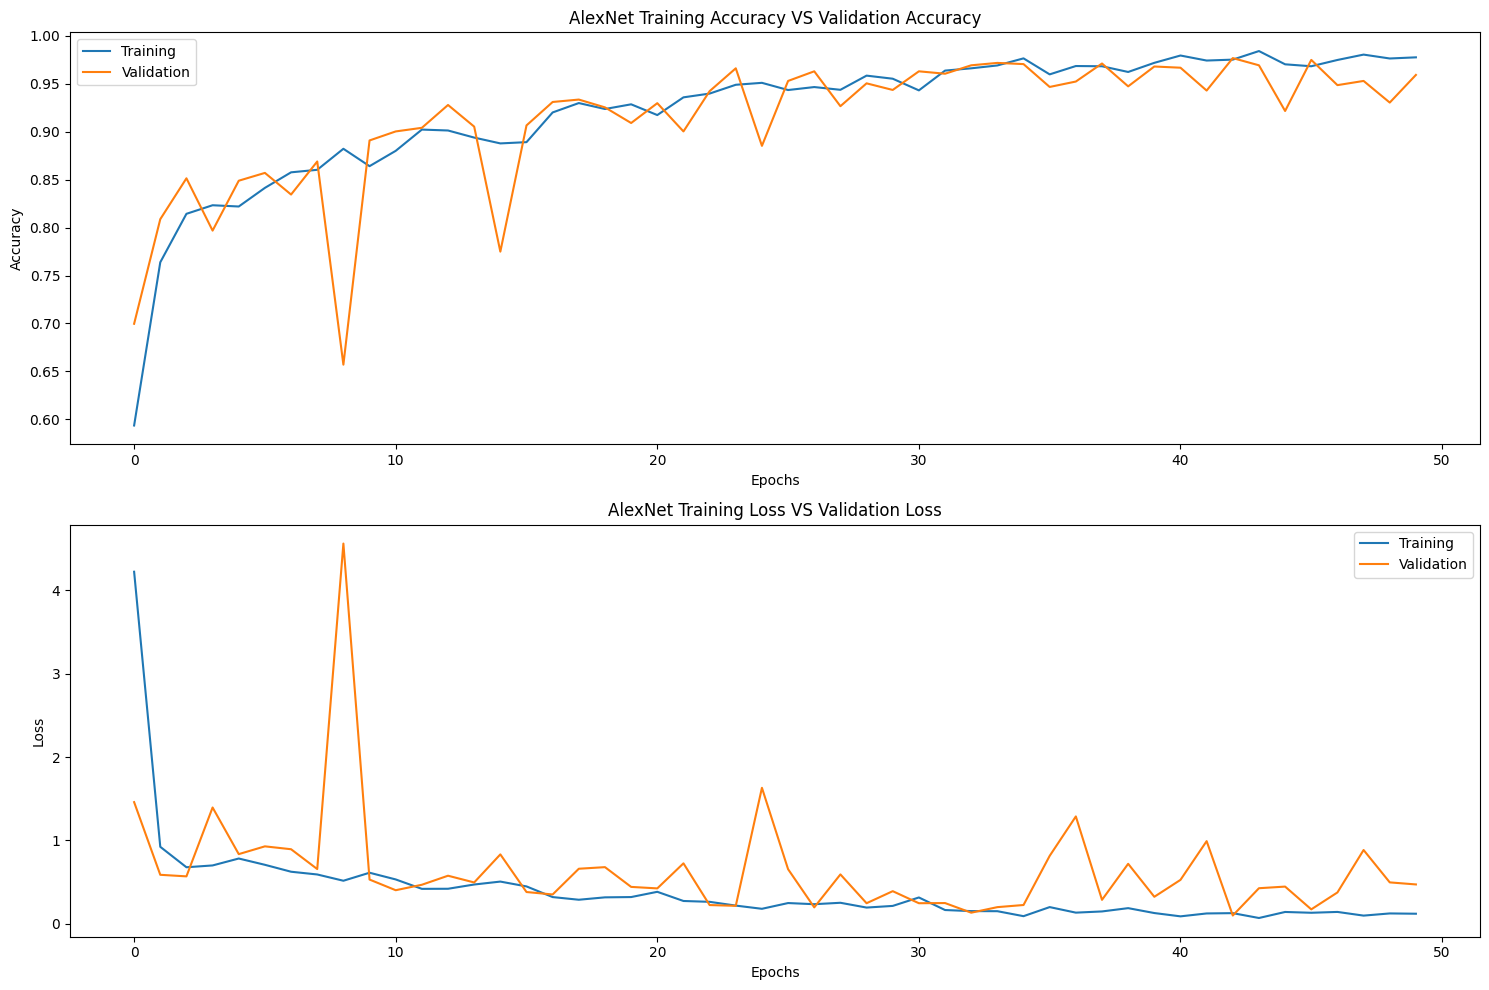

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot Training Accuracy and Validation Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('AlexNet Training Accuracy VS Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Training', 'Validation'])

# Plot Training Loss and Validation Loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('AlexNet Training Loss VS Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Training', 'Validation'])

plt.tight_layout()
plt.show()


In [46]:
# Load the model from the checkpoint path
new_model = tf.keras.models.load_model('Saved_Model/AlexNet/50epoch.43-0.10.h5')

# Save the selected model with a different name
new_model.save('Saved_Model/AlexNet.h5')

In [47]:
# validate accuracy of AlexNet model
test_loss, test_acc = new_model.evaluate(valid_generator, verbose = 2)
print('\nVal_accuracy: ', test_acc)
print('\nVal_loss: ', test_loss)

1595/1595 - 26s - loss: 0.1072 - accuracy: 0.9737 - 26s/epoch - 16ms/step

Val_accuracy:  0.9736677408218384

Val_loss:  0.10720263421535492


1/1 [==============================] - 0s 30ms/step


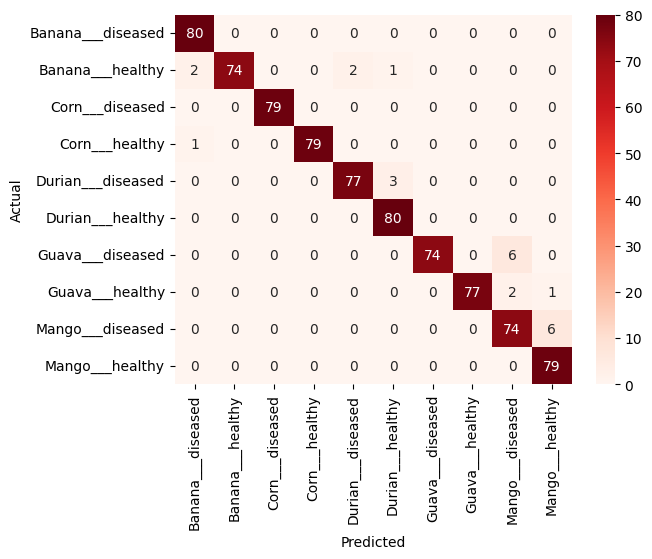

Test accuracy: 96.99%


In [48]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

model = tf.keras.models.load_model('Saved_Model/AlexNet.h5')

filenames = test_generator.filenames
nb_samples = len(test_generator)

y_prob = []
y_act = []

test_generator.reset()
for _ in range(nb_samples):
    X_test, Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Reds', annot=True, fmt='d')
plt.show()

accuracy = np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100
print('Test accuracy: {:.2f}%'.format(accuracy))


In [73]:
import imageio
import tensorflow
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
from PIL import Image
target_names = ['Banana___diseased', 'Banana___healthy', 'Corn___diseased', 'Corn___healthy', 'Durian___diseased', 'Durian___healthy', 'Guava___diseased', 'Guava___healthy', 'Mango___diseased', 'Mango___healthy']
def run(source = None):
    model = tensorflow.keras.models.load_model('Saved_Model/AlexNet.h5')
    img = imageio.imread(source)
    img = Image.fromarray(img).resize((227, 227))
    x = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = x/255
    prediction = model.predict(x)
    print("Predicted Image is:",target_names[np.argmax(prediction)])
run(source=r'/content/split_dataset_227/test/Corn___diseased/Corn___diseased (1319).jpg')

1/1 [==============================] - 0s 145ms/step
Predicted Image is: Corn___diseased
